### KNN Classifier applied on time domain data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from package_toolbox.subpackage_preprocessingtools.FFT_Tool import Compute_Multiple_FFT_in_Chunks
from package_toolbox.subpackage_preprocessingtools import Processed_Data as proc

Load complete files with frequency spectrum per chunk (seperated DE_time and FE_time)

In [20]:
List_of_matfiles_1750 = proc.get_filelist_from_48k_and_Normal_Data('1750')
#X_DE_time_1750, y_DE_time_1750 = Compute_Multiple_FFT_in_Chunks(List_of_matfiles_1750, column='DE_time', rpm='1750')
all_files_as_dict_1750 = proc.get_all_matfiles_as_dict(List_of_matfiles_1750)
y_DE_time_1750, X_DE_time_1750 = proc.get_all_chunks_in_list_DE(all_files_as_dict_1750)

In [28]:
List_of_matfiles_1750 = proc.get_filelist_from_48k_and_Normal_Data('1750')
#X_FE_time_1750, y_FE_time_1750 = Compute_Multiple_FFT_in_Chunks(List_of_matfiles_1750, column='FE_time', rpm='1750')
all_files_as_dict_1750 = proc.get_all_matfiles_as_dict(List_of_matfiles_1750)
y_FE_time_1750, X_FE_time_1750 = proc.get_all_chunks_in_list_FE(all_files_as_dict_1750)

### FE signal data

Model Training, K Neighbors optimization

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_FE_time_1750, y_FE_time_1750, test_size = 0.3, random_state = 42, stratify = y_FE_time_1750)

In [32]:
number_neighbors = []
mean_score = []
std_score = []

for i in range(1, 21):
    clf = KNeighborsClassifier(n_neighbors=i)
    stf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)
    scores = cross_val_score(clf, X_train, y_train, cv=stf)
    
    number_neighbors = np.append(number_neighbors, [i], axis = 0)
    mean_score = np.append(mean_score, [scores.mean()], axis = 0)
    std_score = np.append(std_score, [scores.std()], axis = 0)

dataset_accuracies = pd.DataFrame({'K Neighbors': number_neighbors, 'Mean Accurcy': mean_score, 'Standard Deviation Accuracy': std_score})

In [33]:
dataset_accuracies.head(20)

K Neighbors  Mean Accurcy  Standard Deviation Accuracy
0           1.0      0.435452                     0.034408
1           2.0      0.451405                     0.026905
2           3.0      0.260980                     0.018321
3           4.0      0.260499                     0.017464
4           5.0      0.193330                     0.003421
5           6.0      0.199125                     0.008052
6           7.0      0.154179                     0.007506
7           8.0      0.156111                     0.010386
8           9.0      0.130015                     0.003216
9          10.0      0.135332                     0.008105
10         11.0      0.122280                     0.005800
11         12.0      0.122284                     0.004017
12         13.0      0.114549                     0.004991
13         14.0      0.113100                     0.004720
14         15.0      0.110681                     0.004907
15         16.0      0.110683                     0.004195
16         17.0      0.104880                     0.003570
17         18.0      0.104880                     0.001847
18         19.0      0.103431                     0.002785
19         20.0      0.103430                     0.003492

Validation with Test Data

In [34]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.44532130777903045


In [35]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.70      0.26      0.38        89
           2       0.77      0.84      0.81        89
           3       0.55      0.12      0.20        89
           4       1.00      0.30      0.46        88
           5       0.58      0.24      0.34        89
           6       1.00      0.57      0.72        88
           7       1.00      0.29      0.45        89
           8       0.53      0.37      0.44        89
           9       1.00      0.47      0.64        89
          10       0.18      1.00      0.30        88

    accuracy                           0.45       887
   macro avg       0.73      0.45      0.47       887
weighted avg       0.73      0.45      0.47       887



In [36]:
print(confusion_matrix(y_test, clf.predict(X_test)))

[[23  0  0  0  0  0  0  0  0 66]
 [ 0 75  0  0  0  0  0  0  0 14]
 [ 0  0 11  0  0  0  0  0  0 78]
 [10  2  3 26  2  0  0 11  0 34]
 [ 0  4  0  0 21  0  0  5  0 59]
 [ 0  7  1  0 13 50  0  5  0 12]
 [ 0  9  3  0  0  0 26  2  0 49]
 [ 0  0  0  0  0  0  0 33  0 56]
 [ 0  0  2  0  0  0  0  6 42 39]
 [ 0  0  0  0  0  0  0  0  0 88]]


Text(30.5, 0.5, 'true')

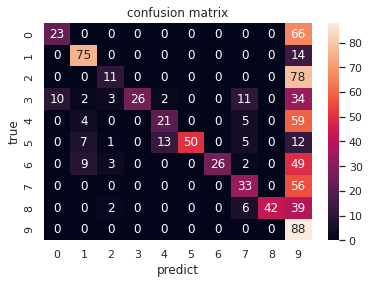

In [37]:
sns.set()
f,ax=plt.subplots()
y_true = y_test
y_pred = clf.predict(X_test)
C2= confusion_matrix(y_true, y_pred)
sns.heatmap(C2,annot=True,ax=ax, fmt='d') 
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 

### DE signal data

Model Training, K Neighbors optimization

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_DE_time_1750, y_DE_time_1750, test_size = 0.3, random_state = 42, stratify = y_DE_time_1750)

In [22]:
number_neighbors = []
mean_score = []
std_score = []

for i in range(1, 21):
    clf = KNeighborsClassifier(n_neighbors=i)
    stf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)
    scores = cross_val_score(clf, X_train, y_train, cv=stf)
    
    number_neighbors = np.append(number_neighbors, [i], axis = 0)
    mean_score = np.append(mean_score, [scores.mean()], axis = 0)
    std_score = np.append(std_score, [scores.std()], axis = 0)

dataset_accuracies = pd.DataFrame({'K Neighbors': number_neighbors, 'Mean Accurcy': mean_score, 'Standard Deviation Accuracy': std_score})

In [23]:
dataset_accuracies.head(20)

K Neighbors  Mean Accurcy  Standard Deviation Accuracy
0           1.0      0.537935                     0.010992
1           2.0      0.485738                     0.007817
2           3.0      0.418072                     0.010956
3           4.0      0.408396                     0.019889
4           5.0      0.381336                     0.019975
5           6.0      0.372153                     0.016279
6           7.0      0.360073                     0.012471
7           8.0      0.344606                     0.013587
8           9.0      0.330593                     0.012676
9          10.0      0.318991                     0.010260
10         11.0      0.312707                     0.007051
11         12.0      0.304492                     0.009310
12         13.0      0.295307                     0.006155
13         14.0      0.288541                     0.004500
14         15.0      0.282740                     0.007112
15         16.0      0.274041                     0.006008
16         17.0      0.268240                     0.007900
17         18.0      0.261955                     0.009172
18         19.0      0.258089                     0.008368
19         20.0      0.249874                     0.007416

Validation with test data

In [24]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.5479143179255919


In [25]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.42      0.16      0.23        89
           2       0.26      0.31      0.29        89
           3       0.62      0.84      0.72        89
           4       1.00      0.83      0.91        88
           5       0.20      0.04      0.07        89
           6       1.00      0.27      0.43        88
           7       0.80      0.62      0.70        89
           8       0.80      0.40      0.54        89
           9       1.00      1.00      1.00        89
          10       0.29      1.00      0.45        88

    accuracy                           0.55       887
   macro avg       0.64      0.55      0.53       887
weighted avg       0.64      0.55      0.53       887



In [26]:
print(confusion_matrix(y_test, clf.predict(X_test)))

[[14 17  0  0  1  0  0  0  0 57]
 [ 2 28  3  0  1  0  0  1  0 54]
 [ 1  1 75  0  0  0  0  1  0 11]
 [ 0  1  0 73  1  0 13  0  0  0]
 [ 4 18  0  0  4  0  0  0  0 63]
 [ 3 11 27  0  3 24  0  1  0 19]
 [ 5 13  3  0  7  0 55  6  0  0]
 [ 4 18 12  0  3  0  1 36  0 15]
 [ 0  0  0  0  0  0  0  0 89  0]
 [ 0  0  0  0  0  0  0  0  0 88]]


Text(30.5, 0.5, 'true')

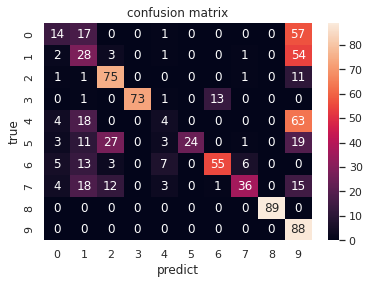

In [27]:
sns.set()
f,ax=plt.subplots()
y_true = y_test
y_pred = clf.predict(X_test)
C2= confusion_matrix(y_true, y_pred)
sns.heatmap(C2,annot=True,ax=ax, fmt='d') 
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 